# Importing necessary libraries

In [1]:
# import requried modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

# Changing directory to folder containing all datasets used
import os
os.chdir("C:\SP\Year 1 Sem 2\Programming for Data Analytics (PDAS)\PDAS CA2\Datasets")

Datasets used:
- Number of Employed Persons Aged Fifteen Years and Over: https://stats.mom.gov.sg/Pages/EmploymentTimeSeries.aspx
- Total Wage Change: https://beta.data.gov.sg/collections/676/datasets/d_ae92f125ca6bf7e3bba260c137a68c79/view
- Number of Employed Persons Aged Fifteen Years and Over: https://stats.mom.gov.sg/Pages/EmploymentTimeSeries.aspx
- Employment Rate of Residents Aged 25 to 64 by Sex: https://beta.data.gov.sg/datasets/d_ca7a8eedf7b8cbe05d5a140a6dc9fc3c/view
- Job Vacancy to Unemployed Person Ratio: https://beta.data.gov.sg/collections/652/view
- Median Duration among unemployed people: https://beta.data.gov.sg/collections/1919/view
- Average Monthly Household Expenditure Among Resident Households (2002, 2003): https://tablebuilder.singstat.gov.sg/table/CT/16659
- Average Monthly Household Expenditure Among Resident Households (2007, 2008): https://tablebuilder.singstat.gov.sg/table/CT/16640
- Average Monthly Household Expenditure Among Resident Households (2017, 2018): https://tablebuilder.singstat.gov.sg/table/CT/16631

# What is employment in Singapore affected by?

## Background Information
Employment is something everyone needs to face when they grow old as money doesn't just come from the sky for free. Expenses, responsibilities, daily expenditures are a part of life and we will need to have the ability to cover them in order to progress in life.

In this data analysis, I will be looking at employment and how different factors affect the rate of employment. I'm currently a Year 1 Poly Student and am interested in how I can improve in order to get the best chance when I graduate.

## Sub-Questions

- Is salary/experience really affecting employment? And by how much?
- What about the economic situation of Singapore at that current time?
- Which factor has the most impact on employment?

- Any potential solutions or ways Singapore/SGeans/SG Govt can do to help employment in Singapore

## Employment in Singapore

In [2]:
# Number of Employed Persons Aged Fifteen Years and Over
# Link: https://stats.mom.gov.sg/Pages/EmploymentTimeSeries.aspx
totalEmployment = pd.read_excel('mrsd_5_Overall_res_emp.xlsx')

print("**Total Employment**", end="\n")
print("\nThe names of the columns are: ")
for name in totalEmployment.columns:
    print(f"- {name} <class - {totalEmployment[name].dtypes}>")

print()    
print(totalEmployment.head())

print(f"\nThere are {totalEmployment.shape[0]} rows and {totalEmployment.shape[1]} columns in this dataset")

**Total Employment**

The names of the columns are: 
- Period <class - int64>
- Total <class - object>
- Residents <class - object>

   Period   Total Residents
0    1991    1645      1345
1    1992  1692.1    1369.8
2    1993  1721.1    1381.6
3    1994  1801.2    1416.1
4    1996  1976.4    1464.8

There are 31 rows and 3 columns in this dataset


In [3]:
# Checking whether there is any missing values in the dataset
totalEmployment.isnull().sum()

Period       0
Total        0
Residents    0
dtype: int64

Since the data for the total number of employed people and residents are the object class instead of float64, I will have to apply conversion to allow for plotting graphs.

In [4]:
# Creating a copy to avoid touching the original dataset
totalEmploymentCopy = totalEmployment.copy(deep=True)

# Dropping the year that are not relevant in the totalEmployment Dataframe
totalEmploymentCopy = totalEmploymentCopy[totalEmploymentCopy['Period'] > 1999]

# Remove non-breaking space and commas from the 'Total' column
totalEmploymentCopy['Total'] = totalEmploymentCopy['Total'].replace({"\xa0": "", ",": ""}, regex=True)
totalEmploymentCopy['Residents'] = totalEmploymentCopy['Residents'].replace({"\xa0": "", ",": ""}, regex=True)

# Convert the columns' dtype to float
totalEmploymentCopy['Total'] = totalEmploymentCopy['Total'].astype(float)
totalEmploymentCopy['Residents'] = totalEmploymentCopy['Residents'].astype(float)

# Check the data types after conversion
print(totalEmploymentCopy.dtypes)

Period         int64
Total        float64
Residents    float64
dtype: object


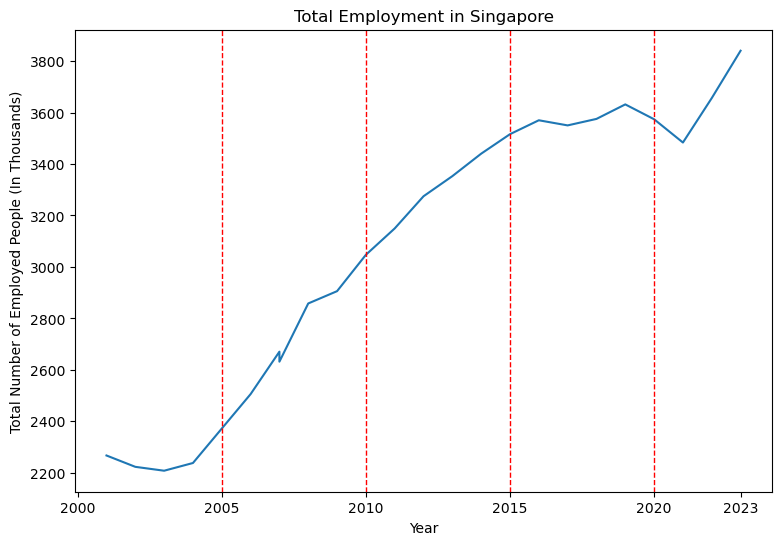

In [5]:
# Initiating a figure
plt.figure(figsize=(9,6))

# Initiating the line charts for 2020 and 2021
plt.plot(totalEmploymentCopy['Period'], totalEmploymentCopy['Total'])

# Setting the x-axis
plt.xticks([2000, 2005, 2010, 2015, 2020, 2023])

# Placing Vertical lines to section 5 years
for year in [2005, 2010, 2015, 2020]:
    plt.axvline(x = year, color = 'r', linestyle='dashed', linewidth=1, label = 'axvline - full height')

# Setting the title for the Line Chart
plt.title('Total Employment in Singapore')

# Setting the labels for the Line Chart
plt.xlabel("Year")
plt.ylabel("Total Number of Employed People (In Thousands)")

plt.show()

I will be comparing employment by sections of 5 years interval. This will give me a wider range of data to analyze between each section, which can give a more informative explanation on what factors are affecting employment.
Looking at the line graph above, we can tell that there is a clear positive trend of total people employed as the years go by, so I will looking at what factors are the reasons for it.

The sections are:
- 2005 - 2010
- 2010 - 2015
- 2015 - 2020

## Total Wage Change in Singapore

In [6]:
# Importing Total Wage Change By Industry 
# Link: https://beta.data.gov.sg/collections/676/datasets/d_ae92f125ca6bf7e3bba260c137a68c79/view
totalWageChange = pd.read_csv('TotalWageChangeTotal.csv')

print("**Total Wage Change**", end="\n")
print("\nThe names of the columns are: ")
for name in totalWageChange.columns:
    print(f"- {name} <class - {totalWageChange[name].dtypes}>")

print()    
print(totalWageChange.head())

print(f"\nThere are {totalWageChange.shape[0]} rows and {totalWageChange.shape[1]} columns in this dataset")

**Total Wage Change**

The names of the columns are: 
- year <class - int64>
- twc <class - float64>

   year  twc
0  2001  1.1
1  2002  0.0
2  2003  1.5
3  2004  3.6
4  2005  4.3

There are 22 rows and 2 columns in this dataset


In [7]:
# Checking whether there is any missing values in the dataset
totalWageChange.isnull().sum()

year    0
twc     0
dtype: int64

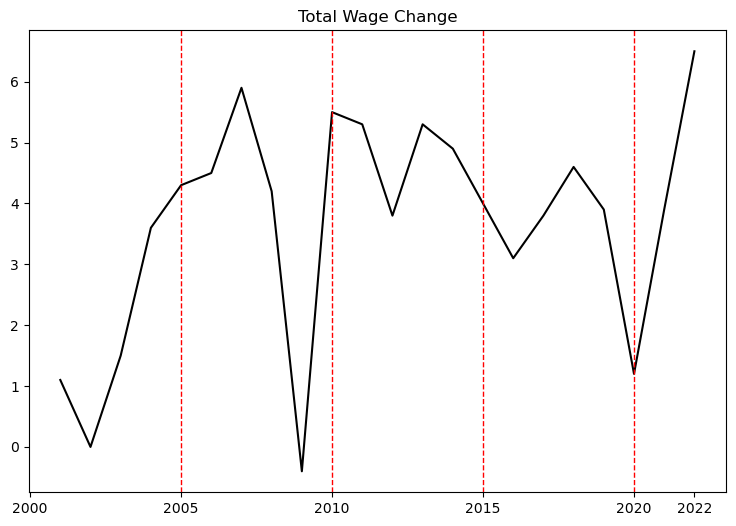

In [8]:
# Initiating a figure
plt.figure(figsize=(9,6))

# Initiating the line charts for 2020 and 2021
plt.plot(totalWageChange['year'], totalWageChange['twc'], color = 'black')

# Setting the x-axis
plt.xticks([2000, 2005, 2010, 2015, 2020, 2022])

# Placing Vertical lines to section 5 years
for year in [2005, 2010, 2015, 2020]:
    plt.axvline(x = year, color = 'r', linestyle='dashed', linewidth=1, label = 'axvline - full height')

# Setting the title for the Line Chart
plt.title('Total Wage Change')

plt.show()

From 2005 to 2010, we can observe that the beginning few years have a slight increase in total wage change, however around 2008 or 2009, there was a massive dip in total wage, which may suggests the reason why section One is the lowest out of the three. (section One had the highest peak, but the lowest dip)

From 2010 to 2015, the total wage change was more or less the same, exluding the dip in the middle years of section Two. Nevertheless, section Two was in the average when compared to the other 2 sections. (section Two had the more stable total wage change)

From 2015 to 2020, section Three had a lower total wage change compared to section Two, and there was a decline at the end of the few years in section Three. (section Three ended with a low dip)

## Employment Rate by Gender

In [9]:
# Employment Rate of Residents Aged 25 to 64 by Sex
# Link: https://beta.data.gov.sg/datasets/d_ca7a8eedf7b8cbe05d5a140a6dc9fc3c/view
employmentGender = pd.read_csv('EmploymentRateofResidentsAged25to64bySex.csv')

print("**Employment Rate by Gender**", end="\n")
print("\nThe names of the columns are: ")
for name in employmentGender.columns:
    print(f"- {name} <class - {employmentGender[name].dtypes}>")

print()    
print(employmentGender.head())

print(f"\nThere are {employmentGender.shape[0]} rows and {employmentGender.shape[1]} columns in this dataset")

**Employment Rate by Gender**

The names of the columns are: 
- year <class - int64>
- sex <class - object>
- emp_rate <class - float64>

   year     sex  emp_rate
0  1991    male      90.9
1  1991  female      50.8
2  1992    male      90.0
3  1992  female      51.9
4  1993    male      90.3

There are 58 rows and 3 columns in this dataset


In [10]:
# Checking whether there is any missing values in the dataset
employmentGender.isnull().sum()

year        0
sex         0
emp_rate    0
dtype: int64

Since I want to compare the percentages between the genders of employed people, I will be using a stacked bar chart on the 3 different sections.

In [11]:
# Creating a copy to avoid touching the original dataset
employmentGenderCopy = employmentGender.copy(deep=True)

# Filter out the years that are not relevant in the employmentGenderCopy Dataframe
employmentGenderCopy = employmentGenderCopy[employmentGenderCopy['year'] > 1999]

# Filtering the Employment by the 3 sections
employmentGenderCopy_first = employmentGenderCopy[employmentGenderCopy['year'] == 2006].reset_index()
for year in [2007, 2008, 2009, 2010]:
    employmentGenderCopy_first = pd.concat([employmentGenderCopy_first, employmentGenderCopy[employmentGenderCopy['year'] == year].reset_index()], ignore_index=True)

employmentGenderCopy_second = employmentGenderCopy[employmentGenderCopy['year'] == 2011].reset_index()
for year in [2012, 2013, 2014, 2015]:
    employmentGenderCopy_second = pd.concat([employmentGenderCopy_second, employmentGenderCopy[employmentGenderCopy['year'] == year].reset_index()], ignore_index=True)

employmentGenderCopy_third = employmentGenderCopy[employmentGenderCopy['year'] == 2016].reset_index()
for year in [2017, 2018, 2019, 2020]:
    employmentGenderCopy_third = pd.concat([employmentGenderCopy_third, employmentGenderCopy[employmentGenderCopy['year'] == year].reset_index()], ignore_index=True)

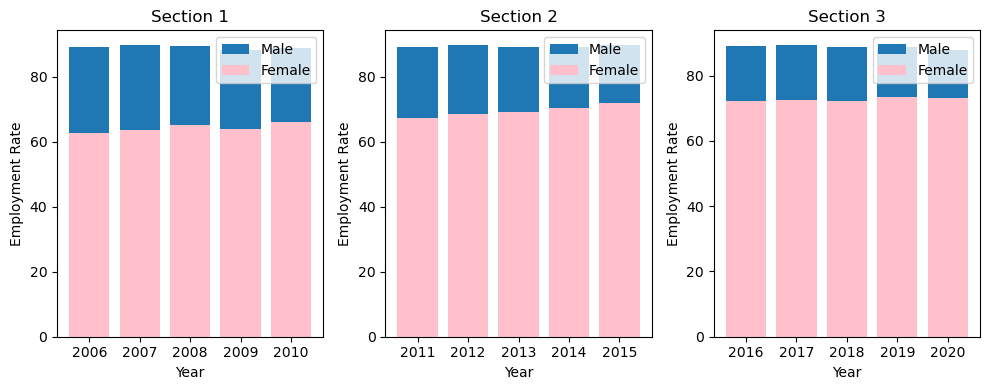

In [12]:
sections = [employmentGenderCopy_first, employmentGenderCopy_second, employmentGenderCopy_third]

fig, axs = plt.subplots(1, 3, figsize=(10, 4))

for i, section in enumerate(sections):
    section_pivot = section.pivot(index='year', columns='sex', values='emp_rate')

    axs[i].bar(section_pivot.index, section_pivot['male'], label='Male')
    axs[i].bar(section_pivot.index, section_pivot['female'], label='Female', color="pink")

    axs[i].set_ylabel('Employment Rate')
    axs[i].set_xlabel('Year')
    axs[i].legend()
    axs[i].set_title(f'Section {i+1}')

plt.tight_layout()
plt.show()

At the start when I glance through it, there doesn't seem to have much of a difference between the 3 sections. However, if we look closely, we can notice that there is a slight increase of the employment rate for the females, which contributes to the increase of employment.

This suggests that companies that beginning to take in more females workers into the workforce.

## Job Vacancy to Unemployed Person Ratio

In [13]:
# Creating another copy to avoid touching the original dataset
totalEmploymentCopy2 = totalEmployment.copy(deep=True)

# Dropping "Residents" column as I'm using the "Total" column with everybody
totalEmploymentCopy2 = totalEmploymentCopy2.drop(columns=['Residents'])

# Filter out the years that are not relevant in the Dataframe
totalEmploymentCopy2 = totalEmploymentCopy2[totalEmploymentCopy2['Period'] > 1999].reset_index()

# Dropping the unecessary index column
totalEmploymentCopy2 = totalEmploymentCopy2.drop(columns=['index'])

totalEmploymentCopy2.head()

,Period,Total
0,2001,2267.3
1,2002,2223.2
2,2003,2208.1
3,2004,2238.1
4,2006,2505.8


In [14]:
# Job Vacancy to Unemployed Person Ratio
# Link: https://beta.data.gov.sg/collections/652/view
jobVacancyRatio = pd.read_csv('JobVacancytoUnemployedPersonRatio.csv')

print("**Job Vacancy to Unemployed Person Ratio**", end="\n")
print("\nThe names of the columns are: ")
for name in jobVacancyRatio.columns:
    print(f"- {name} <class - {jobVacancyRatio[name].dtypes}>")

print()    
print(jobVacancyRatio.head())

print(f"\nThere are {jobVacancyRatio.shape[0]} rows and {jobVacancyRatio.shape[1]} columns in this dataset")

**Job Vacancy to Unemployed Person Ratio**

The names of the columns are: 
- quarter <class - object>
- jv_to_ue <class - float64>

   quarter  jv_to_ue
0  2002-Q1      0.35
1  2002-Q2      0.40
2  2002-Q3      0.37
3  2002-Q4      0.31
4  2003-Q1      0.29

There are 87 rows and 2 columns in this dataset


In [15]:
# Checking whether there is any missing values in the dataset
jobVacancyRatio.isnull().sum()

quarter     0
jv_to_ue    0
dtype: int64

In [16]:
jobVacancyRatio['year'] = jobVacancyRatio['quarter'].str.slice(0,4)

# Pivoting year into the index
jobVacancyCopy = pd.pivot_table(jobVacancyRatio, index=['year'], values=["jv_to_ue"], aggfunc='mean')

# Reset the index
jobVacancyCopy.reset_index(inplace=True)

# Change 'year' column to 'Period' to concantenate with total employment
jobVacancyCopy = jobVacancyCopy.astype({'year':'int64'}) 

# Renaming 'year' to 'Period'
jobVacancyCopy = jobVacancyCopy.rename(columns={"year": "Period"})

jobVacancyCopy.head()

,Period,jv_to_ue
0,2002,0.3575
1,2003,0.2675
2,2004,0.3950
3,2005,0.4700
4,2006,0.6575


In [17]:
# Merging total employment and Job Vacancy to unemployed ratio
employment_jobVacancyRatio = pd.merge(totalEmploymentCopy2, jobVacancyCopy, on='Period')

# Convert the columns' dtype to float
employment_jobVacancyRatio['Total'] = employment_jobVacancyRatio['Total'].replace({"\xa0": "", ",": ""}, regex=True)
employment_jobVacancyRatio['Total'] = employment_jobVacancyRatio['Total'].astype(float)

employment_jobVacancyRatio.head()

,Period,Total,jv_to_ue
0,2002,2223.2,0.3575
1,2003,2208.1,0.2675
2,2004,2238.1,0.3950
3,2006,2505.8,0.6575
4,2007,2670.8,1.1100


In [18]:
# Fitting a linear model to the DataFrame
simpleModel = smf.ols("Total ~ jv_to_ue", data=employment_jobVacancyRatio).fit()

print(simpleModel.params)
print(simpleModel.summary())

Intercept    2402.409573
jv_to_ue      701.337336
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     16.53
Date:                Wed, 07 Feb 2024   Prob (F-statistic):           0.000603
Time:                        14:05:39   Log-Likelihood:                -161.68
No. Observations:                  22   AIC:                             327.4
Df Residuals:                      20   BIC:                             329.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

We can conclude from the above table that:

The simple model has produced a formula
- Total employment = 2402.209 + 701.337 * (Job Vacancy to Unemployed Ratio)

This suggests that when the ratio of jobs available to unemployed is 1, the total employment increases by an estimated amount of 701 thousand people who are employed.

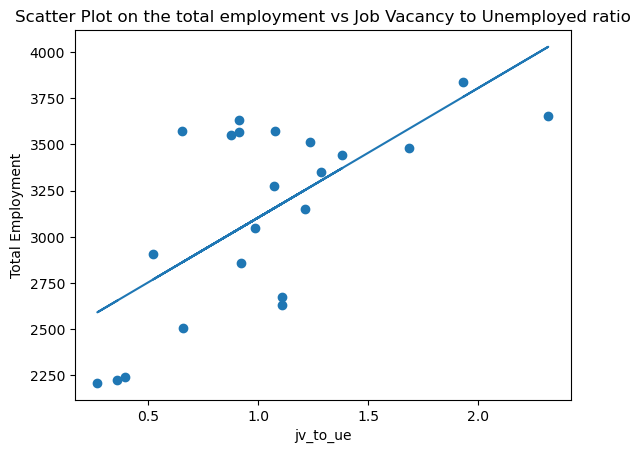

In [19]:
y = employment_jobVacancyRatio['Total']
x = employment_jobVacancyRatio['jv_to_ue']

plt.scatter(y=y, x=x)

m, c = np.polyfit(x, y, deg=1)
plt.plot(x, c+m*x, 'tab:blue')

plt.ylabel('Total Employment')
plt.xlabel('jv_to_ue')
plt.title('Scatter Plot on the total employment vs Job Vacancy to Unemployed ratio')

plt.show()

In [20]:
# Calculating the correlation coefficient btw the 2 variables
corre_coef_1 = np.corrcoef(x, y)

corre_coef_1

array([[1.       , 0.6726954],
       [0.6726954, 1.       ]])

According to the Pearson correlation coefficient, the correlation coefficent between the total employment and job vacancy to unemployed ratio in Singapore is 0.67, which suggests that the relationship between the two variables are positively moderate.

In my opinion, I'm surprise that the relationship between the two variables is not positively strong. This means that there's still other factors that are contributing to the overall increase in total employment.

## Resident Labour Force by highest qualification attained

In [21]:
# Resident Labour Force by highest qualification attained
# Link: https://beta.data.gov.sg/collections/657/view
highestQualif = pd.read_csv('ResidentLabourForceAged15YearsandOverbyHighestQualificationAttainedandSex.csv')

print("**Resident Labour Force by highest qualification attained**", end="\n")
print("\nThe names of the columns are: ")
for name in highestQualif.columns:
    print(f"- {name} <class - {highestQualif[name].dtypes}>")

print()    
print(highestQualif.head())

print(f"\nThere are {highestQualif.shape[0]} rows and {highestQualif.shape[1]} columns in this dataset")

**Resident Labour Force by highest qualification attained**

The names of the columns are: 
- year <class - int64>
- sex <class - object>
- highest_qualification <class - object>
- labour_force <class - int64>

   year   sex      highest_qualification  labour_force
0  1991  male          primary_and_below        281300
1  1991  male            lower_secondary        158800
2  1991  male                  secondary        224400
3  1991  male                   post-sec         76000
4  1991  male  dip_and_professional_qual         58300

There are 348 rows and 4 columns in this dataset


In [22]:
# Checking whether there is any missing values in the dataset
highestQualif.isnull().sum()

year                     0
sex                      0
highest_qualification    0
labour_force             0
dtype: int64

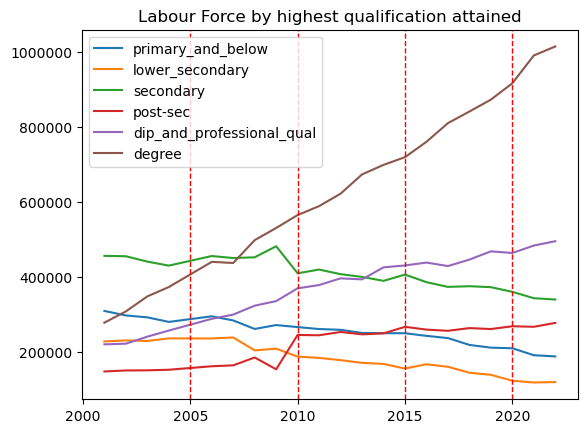

In [23]:
# Creating a copy to avoid touching the original dataset
highestQualifCopy = highestQualif.copy(deep=True)

# Filter out the years that are not relevant in the Dataframe
highestQualifCopy = highestQualifCopy[highestQualifCopy['year'] > 1999]

# Initialize a DataFrame
byHighestQualif = pd.DataFrame()

for qualif in highestQualifCopy['highest_qualification'].unique():
    
    # Initialize another DataFrame
    yearDataframe = pd.DataFrame()
    
    # Obtain all the data connected to one qualification
    yearDataframe = highestQualifCopy[highestQualifCopy['highest_qualification'] == qualif]
    
    # Summing the males and females of the same qualification of that year
    yearDataframe = pd.pivot_table(yearDataframe, index=['year'], values=["labour_force"], aggfunc='sum')
    
    # Plotting line plots for every qualifications by year
    plt.plot(yearDataframe['labour_force'], label=qualif)
    
# Setting the title of the plot 
plt.title("Labour Force by highest qualification attained")

# Altering the y-axis to show the whole number (1.0 -> 1,000,000)
plt.ticklabel_format(style='plain')

# Setting Legends on the plot
plt.legend()

# Placing Vertical lines to section 5 years
for year in [2005, 2010, 2015, 2020]:
    plt.axvline(x = year, color = 'r', linestyle='dashed', linewidth=1, label = 'axvline - full height')

plt.show()

## Visualizing 'Degree' holders to Total Employment

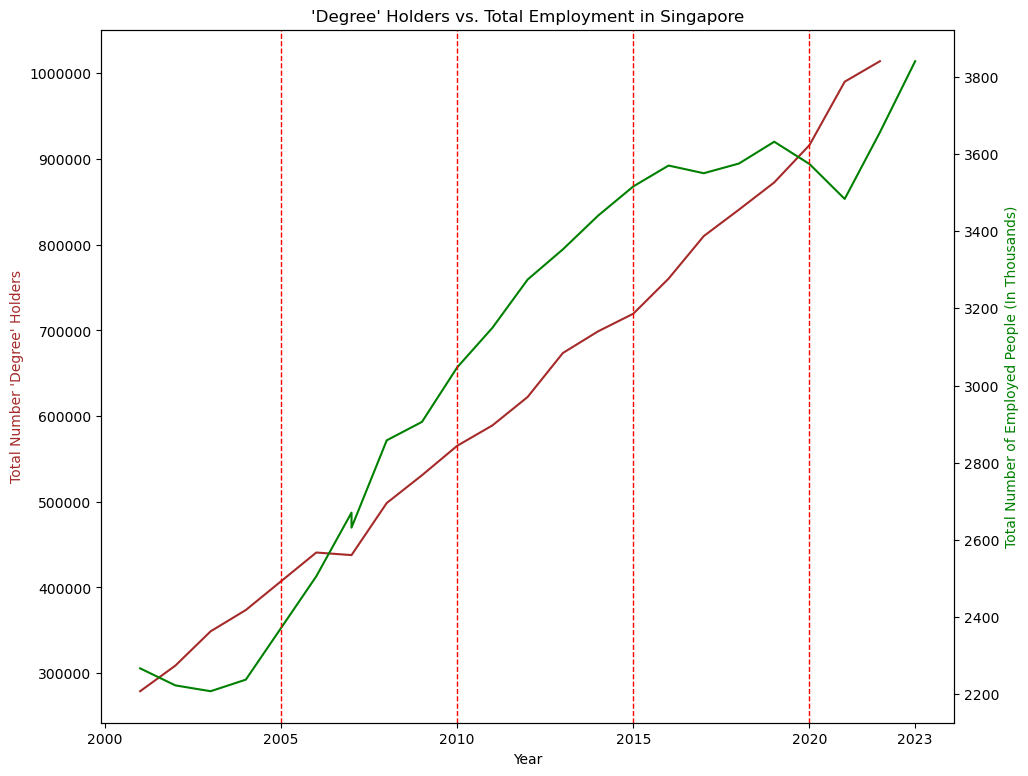

In [24]:
# Initializing a figure
plt.figure(figsize=(11,9))

# Obtain all the data connected to one qualification
degree = highestQualifCopy[highestQualifCopy['highest_qualification'] == 'degree']
    
# Summing the males and females of the same qualification of that year
degree = pd.pivot_table(degree, index=['year'], values=["labour_force"], aggfunc='sum')
    
# Setting the year
year = degree.index
    
# Plotting line plots for every qualifications by year
plt.plot(degree['labour_force'], label='Degree', color='brown')

# Altering the y-axis to show the whole number (1.0 -> 1,000,000)
plt.ticklabel_format(style='plain')

# Setting the labels for the Line Chart
plt.ylabel("Total Number 'Degree' Holders", color='brown')
plt.xlabel("Year")

# To place both graphs in the same plot
plt.twinx()

# Initiating the line charts for 2020 and 2021
plt.plot(totalEmploymentCopy['Period'], totalEmploymentCopy['Total'], color='green')

# Setting the x-axis
plt.xticks([2000, 2005, 2010, 2015, 2020, 2023])

# Placing Vertical lines to section 5 years
for year in [2005, 2010, 2015, 2020]:
    plt.axvline(x = year, color = 'r', linestyle='dashed', linewidth=1, label = 'axvline - full height')

# Setting the title for the Line Chart
plt.title("'Degree' Holders vs. Total Employment in Singapore")

# Setting the labels for the Line Chart
plt.ylabel("Total Number of Employed People (In Thousands)", color='green')

plt.show()

## Median Duration among unemployed people

In [25]:
# Median Duration among unemployed people
# Link: https://beta.data.gov.sg/collections/1919/view
unemploy_duration = pd.read_csv('MedianDurationofUnemploymentAmongUnemployedResidents.csv')

print("**Median Duration among unemployed people**", end="\n")
print("\nThe names of the columns are: ")
for name in unemploy_duration.columns:
    print(f"- {name} <class - {unemploy_duration[name].dtypes}>")

print()    
print(unemploy_duration.head())

print(f"\nThere are {unemploy_duration.shape[0]} rows and {unemploy_duration.shape[1]} columns in this dataset")

**Median Duration among unemployed people**

The names of the columns are: 
- year <class - int64>
- median_dur_of_unemp <class - int64>

   year  median_dur_of_unemp
0  1991                    8
1  1992                    6
2  1993                    6
3  1994                    4
4  1996                    4

There are 29 rows and 2 columns in this dataset


In [26]:
# Checking whether there is any missing values in the dataset
unemploy_duration.isnull().sum()

year                   0
median_dur_of_unemp    0
dtype: int64

In [27]:
# Creating a copy to avoid touching the original dataset
unemploy_duration_copy = unemploy_duration.copy(deep=True)

# Filter out the years that are not relevant in the Dataframe
unemploy_duration_copy = unemploy_duration_copy[unemploy_duration_copy['year'] > 1999]

# Reset the index
unemploy_duration_copy.reset_index(inplace=True)

# Dropping the unecessary index column
unemploy_duration_copy = unemploy_duration_copy.drop(columns=['index'])

# Renaming 'year' to 'Period'
unemploy_duration_copy = unemploy_duration_copy.rename(columns={"year": "Period"})

unemploy_duration_copy.head()

,Period,median_dur_of_unemp
0,2001,8
1,2002,12
2,2003,12
3,2004,12
4,2006,8


In [28]:
# I will be merging the median unemployed duration to the total employment
totalEmploymentCopy2.head()

,Period,Total
0,2001,2267.3
1,2002,2223.2
2,2003,2208.1
3,2004,2238.1
4,2006,2505.8


In [29]:
# Merging total employment and Job Vacancy to unemployed ratio
totalemployment_duration = pd.merge(totalEmploymentCopy2, unemploy_duration_copy, on='Period')

# Convert the columns' dtype to float
totalemployment_duration['Total'] = totalemployment_duration['Total'].replace({"\xa0": "", ",": ""}, regex=True)
totalemployment_duration['Total'] = totalemployment_duration['Total'].astype(float)

totalemployment_duration.head()

,Period,Total,median_dur_of_unemp
0,2001,2267.3,8
1,2002,2223.2,12
2,2003,2208.1,12
3,2004,2238.1,12
4,2006,2505.8,8


In [30]:
# Fitting another linear model to the DataFrame
simpleModel2 = smf.ols("Total ~ median_dur_of_unemp", data=totalemployment_duration).fit()

print(simpleModel2.params)
print(simpleModel2.summary())

Intercept              4780.243382
median_dur_of_unemp    -201.248162
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     10.49
Date:                Wed, 07 Feb 2024   Prob (F-statistic):            0.00411
Time:                        14:05:41   Log-Likelihood:                -163.92
No. Observations:                  22   AIC:                             331.8
Df Residuals:                      20   BIC:                             334.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

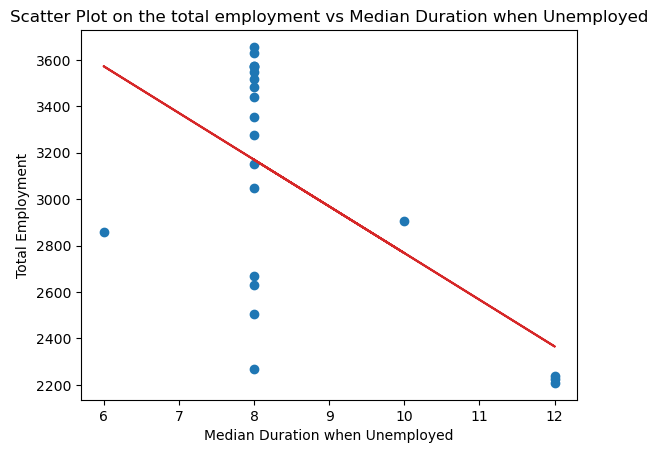

In [31]:
y = totalemployment_duration['Total']
x = totalemployment_duration['median_dur_of_unemp']

plt.scatter(y=y, x=x)

m, c = np.polyfit(x, y, deg=1)
plt.plot(x, c+m*x, 'tab:red')

plt.ylabel('Total Employment')
plt.xlabel('Median Duration when Unemployed')
plt.title('Scatter Plot on the total employment vs Median Duration when Unemployed')

plt.show()

In [32]:
# Calculating the correlation coefficient btw the 2 variables
corre_coef_2 = np.corrcoef(x, y)

corre_coef_2

array([[ 1.        , -0.58661682],
       [-0.58661682,  1.        ]])

According to the Pearson correlation coefficient, the correlation coefficent between the total employment and job vacancy to unemployed ratio in Singapore is -0.59, which suggests that the relationship between the two variables are negatively moderate.

However, we can observe that the linear model's prediction (red line) fits the graph poorly, with points still scattared. I can infer that the relationship between the 2 variables is poor.

## Average Monthly Household Expenditure Among Resident Households

In [33]:
# Average Monthly Household Expenditure Among Resident Households (2002, 2003)
# https://tablebuilder.singstat.gov.sg/table/CT/16659
avg_expenditure_2002 = pd.read_csv('16659_2002_2003.csv')

print("**Median Duration among unemployed people**", end="\n")
print("\nThe names of the columns are: ")
for name in avg_expenditure_2002.columns:
    print(f"- {name} <class - {avg_expenditure_2002[name].dtypes}>")

print()    
print(avg_expenditure_2002.head())

print(f"\nThere are {avg_expenditure_2002.shape[0]} rows and {avg_expenditure_2002.shape[1]} columns in this dataset")

**Median Duration among unemployed people**

The names of the columns are: 
- Type of Goods and Services <class - object>
- Total <class - float64>
- 1 <class - float64>
- 2 <class - float64>
- 3 <class - float64>
- 4 <class - int64>
- 5 <class - float64>
- 6 or More <class - float64>

  Type of Goods and Services   Total       1       2       3     4       5  \
0                      TOTAL  3351.9  1283.1  2273.7  2934.2  3688  4420.7   

   6 or More  
0     5590.9  

There are 1 rows and 8 columns in this dataset


In [34]:
# Checking whether there is any missing values in the dataset
avg_expenditure_2002.isnull().sum()

Type of Goods and Services    0
Total                         0
1                             0
2                             0
3                             0
4                             0
5                             0
6 or More                     0
dtype: int64

In [35]:
# Average Monthly Household Expenditure Among Resident Households (2007, 2008)
# Link: https://tablebuilder.singstat.gov.sg/table/CT/16640
avg_expenditure_2007 = pd.read_csv('16640_2007_2008.csv')

print("**Median Duration among unemployed people**", end="\n")
print("\nThe names of the columns are: ")
for name in avg_expenditure_2007.columns:
    print(f"- {name} <class - {avg_expenditure_2007[name].dtypes}>")

print()    
print(avg_expenditure_2007.head())

print(f"\nThere are {avg_expenditure_2007.shape[0]} rows and {avg_expenditure_2007.shape[1]} columns in this dataset")

**Median Duration among unemployed people**

The names of the columns are: 
- Type of Goods and Services <class - object>
- Total <class - int64>
- 1 <class - float64>
- 2 <class - float64>
- 3 <class - float64>
- 4 <class - float64>
- 5 <class - float64>
- 6 or More <class - float64>

  Type of Goods and Services  Total       1       2       3       4       5  \
0                      TOTAL   3809  1616.5  2569.4  3322.4  4271.3  5209.5   

   6 or More  
0     6134.9  

There are 1 rows and 8 columns in this dataset


In [36]:
# Checking whether there is any missing values in the dataset
avg_expenditure_2007.isnull().sum()

Type of Goods and Services    0
Total                         0
1                             0
2                             0
3                             0
4                             0
5                             0
6 or More                     0
dtype: int64

In [37]:
# Average Monthly Household Expenditure Among Resident Households (2017, 2018)
# Link: https://tablebuilder.singstat.gov.sg/table/CT/16631
avg_expenditure_2017 = pd.read_csv('16631_2017_2018.csv')

print("**Median Duration among unemployed people**", end="\n")
print("\nThe names of the columns are: ")
for name in avg_expenditure_2017.columns:
    print(f"- {name} <class - {avg_expenditure_2017[name].dtypes}>")

print()    
print(avg_expenditure_2017.head())

print(f"\nThere are {avg_expenditure_2017.shape[0]} rows and {avg_expenditure_2017.shape[1]} columns in this dataset")

**Median Duration among unemployed people**

The names of the columns are: 
- Type of Goods and Services <class - object>
- Total <class - float64>
- 1 <class - float64>
- 2 <class - int64>
- 3 <class - float64>
- 4 <class - float64>
- 5 <class - float64>
- 6 or More <class - float64>

  Type of Goods and Services   Total       1     2       3       4       5  \
0                      TOTAL  4906.4  2136.9  3449  4604.8  5919.5  7218.2   

   6 or More  
0     8761.3  

There are 1 rows and 8 columns in this dataset


In [38]:
# Checking whether there is any missing values in the dataset
avg_expenditure_2017.isnull().sum()

Type of Goods and Services    0
Total                         0
1                             0
2                             0
3                             0
4                             0
5                             0
6 or More                     0
dtype: int64

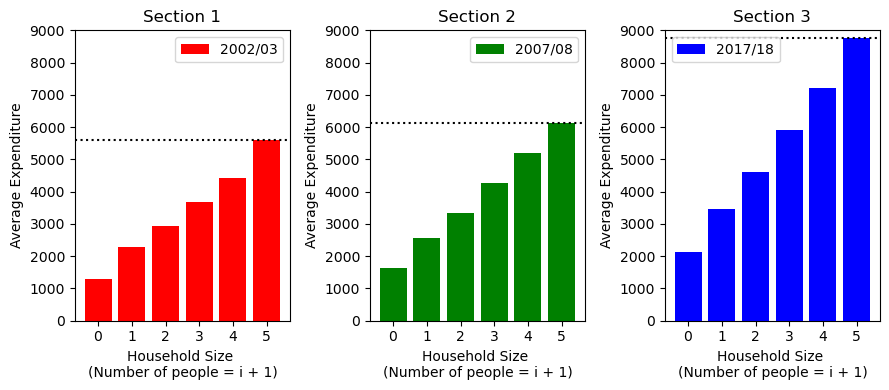

In [39]:
# Setting the x-axis labels
categories = [0, 1, 2, 3, 4, 5]
# DataFrames to be placed in a for loop
section = [avg_expenditure_2002, avg_expenditure_2007, avg_expenditure_2017]
# To change colors of the different bar charts
color = ["red", "green", "blue"]
# To label the years
year = ['2002/03', '2007/08', '2017/18']
# Highest values for the 3 bar charts
highest = [5590.9, 6134.9, 8761.3]
# Setting the bar charts width
bar_width = 0.8
index = np.arange(len(categories))

fig, axs = plt.subplots(1, 3, figsize=(9, 4))

for i, section in enumerate(section):
    axs[i].bar(index, section.iloc[0, 2:], bar_width, label=year[i], color=color[i])
    
    axs[i].set_ylim(0,9000)    
    axs[i].set_ylabel('Average Expenditure')
    axs[i].set_xlabel('Household Size \n(Number of people = i + 1)')
    axs[i].set_xticks(categories)
    axs[i].legend()
    axs[i].set_title(f'Section {i+1}')
    
    axs[i].axhline(y = highest[i], color = 'black', linestyle = 'dotted') 
    
plt.tight_layout()
plt.show()